In [33]:
from collections import defaultdict
import pandas
from matplotlib import pyplot as plt
import pandas_format
pandas.set_option('display.max_columns', None)

with open('/home/ict520c/Downloads/hparams_iteration1.json', 'r') as f:
    import json
    json_data = json.load(f)

df_data = defaultdict(list)
for iteration in json_data['sessionGroups']:
    for param_name, param_value in iteration['hparams'].items():
        df_data[param_name].append(param_value)

    for metric in iteration['metricValues']:
        df_data[metric['name']['tag']].append(metric['value'])

df = pandas.DataFrame(df_data)
# df.to_csv('hparams_iteration1.csv')

metric_columns = df.columns[df.columns.str.contains('_')].drop('f1_score')
hparam_columns = df.columns[~df.columns.str.contains('_')]
m, h = metric_columns, hparam_columns

In [35]:
df.groupby('Learning Rate')[metric_columns].mean()
# LR = 3e-4

,class_precision,class_recall,prec_15,prec_25,prec_5,recall_15,recall_25,recall_5
Learning Rate,,,,,,,,
0.00,0.70,0.81,0.65,0.78,0.31,0.76,0.87,0.40
0.00,0.78,0.68,0.51,0.71,0.21,0.39,0.48,0.19
0.00,0.86,0.63,0.42,0.63,0.14,0.18,0.23,0.08


In [36]:
h = h.drop(['Learning Rate'])
df2 = df.loc[df['Learning Rate'] == 3e-4].drop('Learning Rate', axis=1)
df2

,Last Convolution,# of GRUs,GRU size,Convolutional Filters,First Convolution,class_precision,class_recall,f1_score,prec_15,prec_25,prec_5,recall_15,recall_25,recall_5
0,5.00,1.00,512.00,16.00,0.00,0.65,0.81,0.40,0.71,0.80,0.38,0.88,0.95,0.50
2,4.00,1.00,128.00,16.00,0.00,0.74,0.86,0.36,0.70,0.81,0.32,0.86,0.95,0.43
3,5.00,1.00,128.00,16.00,1.00,0.72,0.84,0.42,0.68,0.80,0.32,0.83,0.94,0.42
5,4.00,2.00,384.00,16.00,0.00,0.66,0.84,0.38,0.65,0.76,0.29,0.89,0.97,0.46
7,4.00,1.00,384.00,16.00,0.00,0.68,0.85,0.39,0.69,0.80,0.33,0.88,0.97,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,5.00,1.00,256.00,72.00,0.00,0.71,0.69,0.26,0.47,0.65,0.22,0.64,0.79,0.35
462,4.00,1.00,256.00,72.00,1.00,0.68,0.82,0.38,0.65,0.76,0.31,0.85,0.94,0.45
466,4.00,2.00,64.00,72.00,1.00,0.72,0.81,0.36,0.68,0.80,0.32,0.85,0.94,0.46
475,5.00,2.00,384.00,72.00,0.00,0.68,0.72,0.26,0.57,0.76,0.24,0.63,0.80,0.28


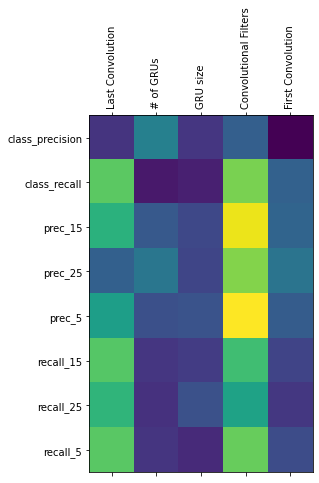

,Last Convolution,# of GRUs,GRU size,Convolutional Filters,First Convolution
class_precision,-0.103,0.278,0.108,-0.197,0.010
class_recall,-0.471,0.051,-0.065,-0.503,0.201
prec_15,-0.404,0.181,0.142,-0.608,0.208
prec_25,-0.199,0.251,0.138,-0.513,0.247
prec_5,-0.354,0.159,0.167,-0.626,0.189
recall_15,-0.464,-0.108,-0.119,-0.436,0.136
recall_25,-0.413,-0.097,-0.162,-0.364,0.109
recall_5,-0.468,-0.105,-0.083,-0.483,0.153


In [37]:
corr = df2.corr()
plt.matshow(corr.loc[m, h].abs())
plt.xticks(range(len(h)), h, rotation='vertical')
plt.yticks(range(len(m)), m)
plt.show()
with pandas_format.PandasFloatFormatter('{:,.3f}'):
    display(corr.loc[m, h])

In [43]:
df2['sum_measures'] = df2[m].sum(axis=1)
df2 = df2.sort_values('sum_measures', ascending=False)
with pandas_format.PandasFloatFormatter('{:,.4f}'):
    display(df2[h.append(m)].iloc[:10])

,Last Convolution,# of GRUs,GRU size,Convolutional Filters,First Convolution,class_precision,class_recall,prec_15,prec_25,prec_5,recall_15,recall_25,recall_5
45,4.0000,1.0000,384.0000,16.0000,1.0000,0.7930,0.8848,0.8071,0.8711,0.4773,0.9087,0.9702,0.5732
101,4.0000,1.0000,512.0000,16.0000,0.0000,0.7495,0.8657,0.7974,0.8706,0.4309,0.9214,0.9780,0.5308
56,4.0000,2.0000,256.0000,16.0000,0.0000,0.8267,0.9199,0.7642,0.8521,0.4172,0.8823,0.9673,0.5103
51,4.0000,1.0000,256.0000,16.0000,1.0000,0.7090,0.8794,0.7983,0.8750,0.4299,0.9048,0.9766,0.5347
36,5.0000,1.0000,384.0000,16.0000,1.0000,0.7651,0.8804,0.7935,0.8745,0.4072,0.9009,0.9653,0.5073
43,4.0000,1.0000,256.0000,16.0000,0.0000,0.7554,0.8652,0.7969,0.8647,0.4014,0.9116,0.9702,0.5103
198,4.0000,2.0000,256.0000,32.0000,1.0000,0.7617,0.8784,0.7915,0.8696,0.3965,0.8926,0.9702,0.5073
59,4.0000,2.0000,128.0000,16.0000,1.0000,0.7290,0.8770,0.7935,0.8745,0.4258,0.8711,0.9551,0.4988
165,4.0000,2.0000,128.0000,32.0000,1.0000,0.7339,0.8638,0.7886,0.8765,0.4016,0.8823,0.9707,0.4900
35,4.0000,1.0000,512.0000,16.0000,1.0000,0.7085,0.8618,0.7739,0.8516,0.3945,0.9238,0.9712,0.5044


In [39]:
m

Index(['class_precision', 'class_recall', 'prec_15', 'prec_25', 'prec_5',
       'recall_15', 'recall_25', 'recall_5'],
      dtype='object')